# 子集问题

### 1.子集（1）

#### 输入一个不包含重复数字的数组`[1,2,3]`，要求输出这些数字的所有子集。

* 子集问题就是收集树形结构中树的所有节点的结果。

* 第一种解法是利用**数学归纳法**的思想，`求[1,2,3]的子集`，如果知道了[1,2]的子集，subset([1,2,3])等于subset([1,2])的结果中每个集合再添加上 3，如果`A=subset([1,2,3])`，那么`subset([1,2,3])=A+[A[i].add(3) for i = 1...len(A)]`。一个典型的递归结构。

* 第二种通用方法就是回溯算法。

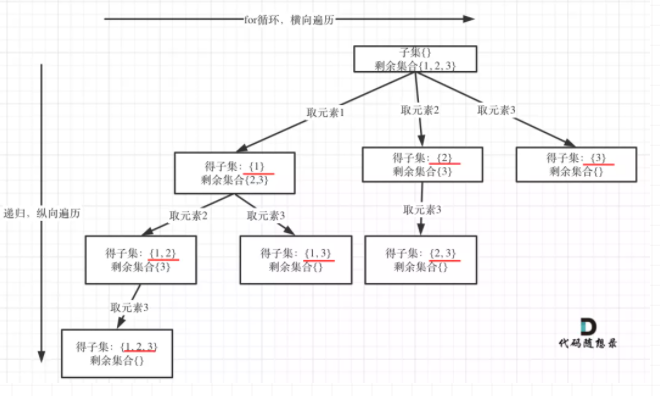

* 终止条件：集合为空的时候，就是叶子节点。

In [24]:
res = []
path = []   # 子集
def backtrack(nums, start):   # 这里可以不加终止条件，因为每次递归已经遍历到叶子节点了
    res.append(path[:])
    for i in range(start, len(nums)):
        path.append(nums[i])
        backtrack(nums, i + 1)
        path.pop()

In [25]:
nums = [1,2,3]
backtrack(nums, 0)

In [26]:
res

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]

### 2.子集（2）

#### 给你一个整数数组，可能包含重复元素，例如`[1,2,2]`，返回该数组所有可能的子集。

* 本题方法的重点就是去重。去重方法：对同一层使用过的元素进行跳过。

In [31]:
res = []
path = []
def backtrack(nums, start):
    res.append(path[:])
    for i in range(start, len(nums)):
        if i > start and nums[i] == nums[i - 1]:   # 对同一层使用过的元素进行跳过
            continue
        path.append(nums[i])
        backtrack(nums, i + 1)
        path.pop()

In [32]:
nums = [1,2,2]
nums.sort()
backtrack(nums, 0)

In [33]:
res

[[], [1], [1, 2], [1, 2, 2], [2], [2, 2]]

### 3. 集合划分

#### 输入一个数组`nums`和一个正整数`k`，请你判断`nums`是否能够被平分为元素和相同的`k`个子集。

* 有两种不同的视角
    * 视角1：切换到n个数字的视角，每个数字都要选择进入到`k`个桶中的某一个。
    * 视角2：切换到k个桶的视角，对于每个桶，都要遍历`nums`中的`n`个数字，然后选择是否将当前遍历到的数字装进自己的桶里。

##### 以数字的视角

* 递归遍历数组

In [45]:
def traverse(nums, index):
    if index == len(nums):
        return
    print(nums[index])
    traverse(nums, index + 1)

In [46]:
nums = [1,2,3]

In [47]:
traverse(nums, 0)

1
2
3


In [64]:
def canPartitionKSubsets(nums, k):
    if k > len(nums):
        return False
  # 不能平均分配
    if sum(nums) % k != 0:
        return False
    bucket = [0 for _ in range(k)]   # k个桶初始化
    target = sum(nums) // k  # 每个桶的数字和

    # 优化，从大到小排序，大的数字先分配到bucket中，对之后的数字，只会更大，更容易触发剪枝的if条件，减少递归调用
    nums.sort(reverse=True)
    
    def backtrack(nums, index):
    # 所有的数字都已装进桶里
        if index == len(nums):
            return True
        for i in range(len(bucket)):
            # 剪枝
            if bucket[i] + nums[index] > target:
                continue
            # 装进桶
            bucket[i] += nums[index]
            if backtrack(nums, index + 1):
                return True
            # 撤销操作
            bucket[i] -= nums[index]
        return False
    return backtrack(nums, 0)

In [68]:
nums = [1,2,3,4,5]
k = 3
print(canPartitionKSubsets(nums, k))

True


##### 以桶的视角（时间复杂度更低）

In [69]:
class Solution(object):
    def canPartitionKSubsets(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: bool
        """
        # 方便剪枝
        nums.sort(reverse=True)
        if k > len(nums):return False
        if sum(nums) % k != 0:return False
        used = [False for _ in range(len(nums))]
        target = sum(nums) // k

        def backtrack(nums, k, bucket, start, used, target):
            # 所有桶装满了
            if k == 0:
                return True
            if bucket == target:
                # 该桶已装满，递归下一桶
                return backtrack(nums, k - 1, 0, 0, used, target)
            for i in range(start, len(nums)):
              	# 数字i已被装进桶
                if used[i]:
                    continue
                if nums[i] + bucket > target:
                    continue
                # 将数字i装进桶里
                used[i] = True
                bucket += nums[i]
                # 递归下一个数字
                if backtrack(nums, k, bucket, i + 1, used, target):
                    return True
                # 撤销操作
                used[i] = False
                bucket -= nums[i]
            return False
        return backtrack(nums, k, 0, 0, used, target)

In [72]:
nums = [1,2,3,4,5]
k = 3
canPartitionKSubsets(nums, k)

True

* 时间复杂度
    * 第一种：每个元素都有k种选择，所以是`O(k^n)`
    * 第二种：每个桶要遍历n个数字，选择`[装入]`或`[不装入]`，有`2^n`种结果，有k个桶，所以时间复杂度是`O(k*2^n)`